# Assessed Task 3

# Setup


First, let's make sure this notebook works well in both python 2 and 3, import a few common modules and ensure MatplotLib plots figures inline.

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Activation functions

Here, we extend the code block to creat functions for leaky ReLUs with parameters alpha = 0.01 and 0.2, along with the other provided activation functions and are therefore defined as *lrelu1()* and *lrelu2()*

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def lrelu1(z, alpha=0.01):
    return np.maximum(alpha*z, z)
  
def lrelu2(z, alpha=0.2):
    return np.maximum(alpha*z, z)

## Activation function graphs

Using matplot, we plot the LeakyReLU functions similar to the existing activation functions.

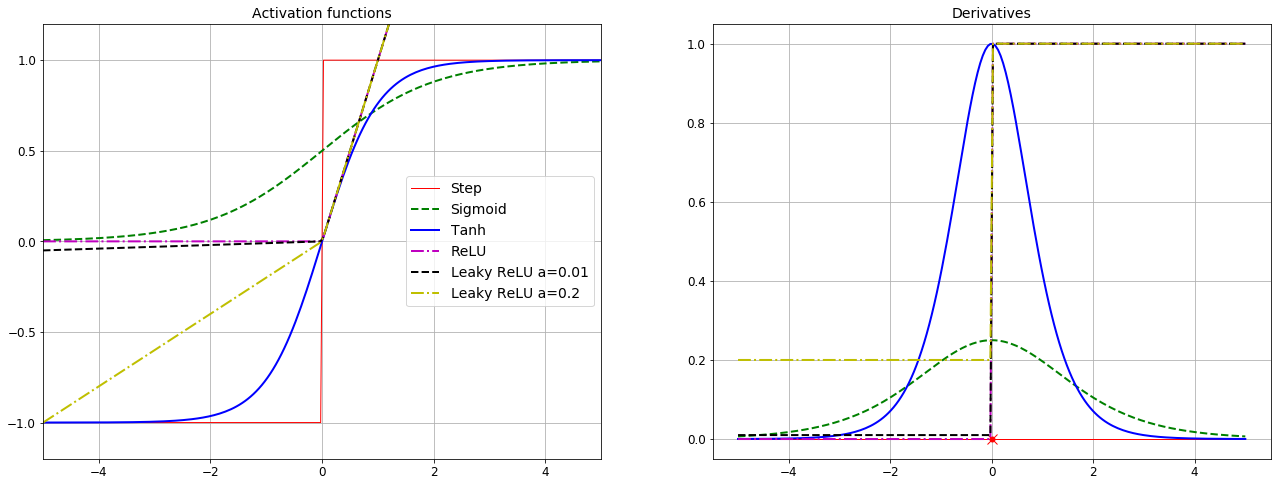

In [12]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(22,8))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot(z, lrelu1(z), "k--", linewidth=2, label="Leaky ReLU a=0.01")
plt.plot(z, lrelu2(z), "y-.", linewidth=2, label="Leaky ReLU a=0.2")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.plot(z, derivative(lrelu1, z), "k--", linewidth=2, label="Leaky ReLU a=0.01")
plt.plot(z, derivative(lrelu2, z), "y-.", linewidth=2, label="Leaky ReLU a=0.2")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
#plt.axis([-5, 5, -1.2, 1.2]) It's easier to differenciate the LeakyReLU functions without mentioning the axes.
plt.show()

In [0]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

## Activation function XOR multilayer perceptron graph

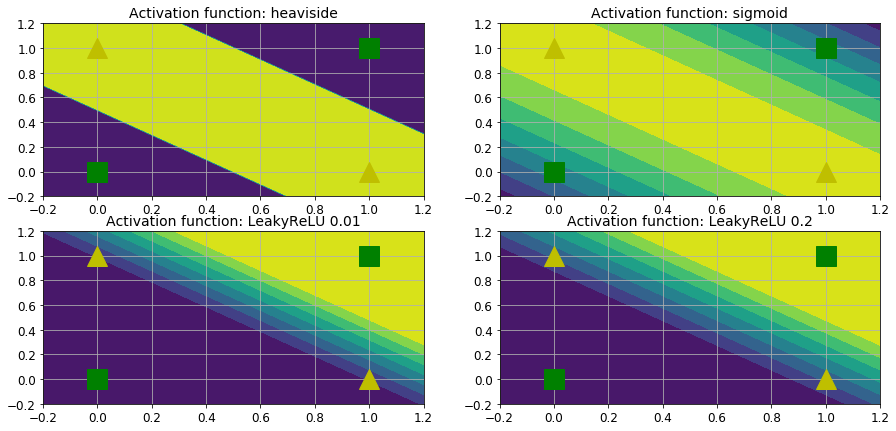

In [14]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)
z3 = mlp_xor(x1, x2, activation=lrelu1)
z4 = mlp_xor(x1, x2, activation=lrelu2)

plt.figure(figsize=(15,7))

plt.subplot(221)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(222)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

plt.subplot(223)
plt.contourf(x1, x2, z3)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: LeakyReLU 0.01", fontsize=14)
plt.grid(True)

plt.subplot(224)
plt.contourf(x1, x2, z4)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: LeakyReLU 0.2", fontsize=14)
plt.grid(True)

# FNN for MNIST

## FNN Model with 100% MNIST Data

Taken from **Using the Estimator API (formerly `tf.contrib.learn`)** of Chapter 10 notebook, this block only contains the code for loading the MNIST dataset. 

In [15]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid_100, X_train_100 = X_train[:5000], X_train[5000:]
y_valid_100, y_train_100 = y_train[:5000], y_train[5000:]


11493376/11490434 [==============================] - 0s 0us/step


Taken from **Using plain TensorFlow** , this block contains the definitions of the **batch_size** variable and the *shuffle_batch()* function defined in the Chapter 10 notebook

In [0]:
batch_size = 50
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

Blocks from here on remains the same as the code from the **"Using *dense()* instead of *neuron_layer()*"** block  in the Chapter 10 notebook, however, there's a change in the activation function,  instead of the standard ReLU the NN uses a leaky ReLU.

In [0]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [0]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

This is where we change our activation function. The following code uses the *partial()* function to alter the default arguments (here the alpha value) that are present in the built-in leaky ReLU activation function. Using this function, we can change the value of alpha to 0.1

In [19]:
from functools import partial
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=partial(tf.nn.leaky_relu, alpha=0.1))  ## <-- using LeakyReLU
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=partial(tf.nn.leaky_relu, alpha=0.1))  ## <-- using LeakyReLU
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


The block defines the loss function using softmax

In [0]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

The learning rate as well as the training optimizer are defined using existing functions in tf

In [0]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

The best value as well as the accuracy is calculated in the following block

In [0]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Every tensor available is now initialized in the following code while also declaring a Saver tensor that can be use to save at a certain checkpoint or restore that specific checkpoint

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

The following code now starts a session and trains a model while also finding the batch accuracy, validation accuracy as well as predicting values with respect to *X_test*. Lastly, the model is saved as **model_100.ckpt**

In [24]:
n_epochs = 20
n_batches = 50
acc_valid1 = [None] * n_epochs

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train_100, y_train_100, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid1[epoch] = accuracy.eval(feed_dict={X: X_valid_100, y: y_valid_100})
        print("100% MNIST Epoch:", epoch, " Batch accuracy:", acc_batch, " Validation accuracy:", acc_valid1[epoch])
    Z = logits.eval(feed_dict={X: X_test})
    y_pred = np.argmax(Z, axis=1)
    save_path = saver.save(sess, "./model_100.ckpt")

100% MNIST Epoch: 0  Batch accuracy: 0.9  Validation accuracy: 0.9042
100% MNIST Epoch: 1  Batch accuracy: 0.92  Validation accuracy: 0.9238
100% MNIST Epoch: 2  Batch accuracy: 0.94  Validation accuracy: 0.9342
100% MNIST Epoch: 3  Batch accuracy: 0.9  Validation accuracy: 0.9394
100% MNIST Epoch: 4  Batch accuracy: 0.94  Validation accuracy: 0.9448
100% MNIST Epoch: 5  Batch accuracy: 0.94  Validation accuracy: 0.948
100% MNIST Epoch: 6  Batch accuracy: 1.0  Validation accuracy: 0.9512
100% MNIST Epoch: 7  Batch accuracy: 0.94  Validation accuracy: 0.9568
100% MNIST Epoch: 8  Batch accuracy: 0.94  Validation accuracy: 0.9592
100% MNIST Epoch: 9  Batch accuracy: 0.94  Validation accuracy: 0.9622
100% MNIST Epoch: 10  Batch accuracy: 0.92  Validation accuracy: 0.9642
100% MNIST Epoch: 11  Batch accuracy: 0.98  Validation accuracy: 0.9664
100% MNIST Epoch: 12  Batch accuracy: 0.98  Validation accuracy: 0.965
100% MNIST Epoch: 13  Batch accuracy: 0.98  Validation accuracy: 0.9678
100% MN

**Q. Compare this to the results from the Chapter 10 code using the standard ReLU.  Are they better or worse or essentially the same?  Why do you think this is?**

The standard ReLU and this model trained using the LeakyReLU gives out almost same validation accuracy values. The FNN has only 2 hidden layers which doesn't give noticable changes in the two activation functions. The ReLU units always saturates to 0 which makes it better for a classification problem we're dealing with (classifying from 0 to 9). Therefore using LeakyReLU makes it irrelevant/redundant for this specific ML case. It is noticable that we do not have a vanishing gradient or exploding gradient since they are similar.

### Confusion Matrix

Here the confusion matrix is created using the default tensorflow function with arguments as the predicted values  and the *X_test* variable. The largest off-diagonal value in the confusion matrix represents the greatest number of errors between two individual classes while the indices shows us the exact labels in each of the respective classes.

In [31]:
from numpy import unravel_index
with tf.Session() as sess:
    saver.restore(sess, "./model_100.ckpt")
    con = tf.confusion_matrix(labels=y_test, predictions=y_pred)
    print(sess.run(con))
    a = con.eval()
    np.fill_diagonal(a, 0)
    (i1,i2) = unravel_index(a.argmax(), a.shape)
    print("The highest error value is: ",a.max(),"\nThe indices are ",unravel_index(a.argmax(), a.shape))
    print("This implies that the label",i1,"is usually being predicted as",i2,"by the model relatively")

INFO:tensorflow:Restoring parameters from ./model_100.ckpt
[[ 966    0    0    1    2    2    4    2    2    1]
 [   0 1120    3    1    0    1    4    2    4    0]
 [   6    1  999    5    3    0    3    7    6    2]
 [   0    0    6  983    0    2    0    8    3    8]
 [   0    0    5    0  959    0    2    1    2   13]
 [   5    1    1   11    3  850    9    1    5    6]
 [   5    3    0    1   10    6  932    0    1    0]
 [   0    7   12    2    2    1    0  988    1   15]
 [   4    2    5    7    7    6    8    8  919    8]
 [   4    6    1    8   12    1    1    3    0  973]]
The highest error value is:  15 
The indices are  (7, 9)
This implies that the label 7 is usually being predicted as 9 by the model relatively


## FNN model for 50% of MNIST Data

  The same steps are repeated but instead for the first half of the original MNIST data. Here 10% of the training data (after the 50% split) has been used as the validation set. The validation accuracy for each epoch is saved as well as a checkpoint **model_50.ckpt** is used to save the model.

In [0]:
p50 = int(len(X_train)*0.5)
X_train_50, y_train_50 = X_train[:p50], y_train[:p50]

valid_p50 = int(len(X_train_50)*0.1) 
X_valid_50, X_train_50 = X_train_50[:valid_p50], X_train_50[valid_p50:]
y_valid_50, y_train_50 = y_train_50[:valid_p50], y_train_50[valid_p50:]

acc_valid2 = [None] * n_epochs
#reset_graph()
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train_50, y_train_50, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid2[epoch] = accuracy.eval(feed_dict={X: X_valid_50, y: y_valid_50})
        #print("50% MNIST Epoch:", epoch, " Batch accuracy:", acc_batch, " Validation accuracy:", acc_valid2[epoch])
    save_path = saver.save(sess, "./model_50.ckpt")

## FNN model for 25% of MNIST Data

The same goes for this model that only takes first 25% of the original MNIST data. The checkpoint for this model is saved in **model_25.ckpt**

In [0]:
p25 = int(len(X_train)*0.25)
X_train_25, y_train_25 = X_train[:p25], y_train[:p25]

valid_p25 = int(len(X_train_25)*0.1) 
X_valid_25, X_train_25 = X_train_25[:valid_p25], X_train_25[valid_p25:]
y_valid_25, y_train_25 = y_train_25[:valid_p25], y_train_25[valid_p25:]

acc_valid3 = [None] * n_epochs

#reset_graph()
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train_25, y_train_25, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid3[epoch] = accuracy.eval(feed_dict={X: X_valid_25, y: y_valid_25})
        #print("25% MNIST Epoch:", epoch, " Batch accuracy:", acc_batch, " Validation accuracy:", acc_valid3[epoch])
    save_path = saver.save(sess, "./model_25.ckpt")

## Effect of Training Set Size

The curve is drawn for three different arrays of validation accuracies for each epoch value in the model containing 100%, 50% and 25%. 

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Validation Accuracy for different proportions of Training set')

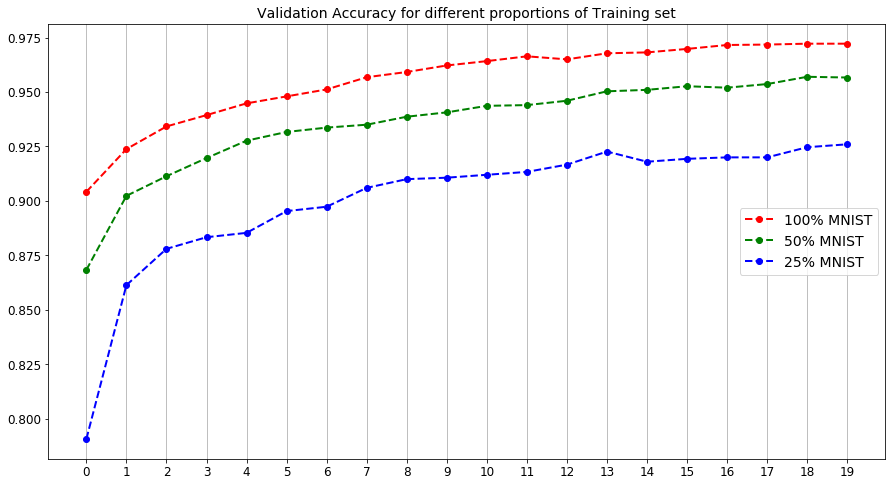

In [60]:
epochs = range(n_epochs)
plt.figure(figsize=(15,8))
plt.plot(epochs, acc_valid1, "r--", linewidth=2, label="100% MNIST", marker='o')
plt.plot(epochs, acc_valid2, "g--", linewidth=2, label="50% MNIST", marker='o')
plt.plot(epochs, acc_valid3, "b--", linewidth=2, label="25% MNIST", marker='o')
# plt.grid(True)
ax = plt.subplot()
ax.set_xticks(epochs)
ax.xaxis.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Validation Accuracy for different proportions of Training set", fontsize=14)

As observed the accuracy values for lesser percentages of the data are comparetively less as well. Each of them get progressively better but 100% MNIST stays higher than its predecesser and same goes for 50% with respect to 25%.
This is because neural networks require more a lot more data to train the model, the more data the better but also keeping it mind that it doesn't overfit. But in general more data is always better than a fine tuned algorithm. 